In [1]:
from typing import cast

from cfrpy.pkr.game import RiverOfBlood, Fold
from cfrpy.pkr.abstraction.game import RiverOfBlood as Abstraction
from cfrpy.escfr import eswalk
from cfrpy.cfr import walk
from cfrpy.game import Player, mc, play

In [2]:
list(mc(Abstraction()))

[Draw(hand=(Card("Ah"), Card("3d"))),
 Draw(hand=(Card("7d"), Card("Ts"))),
 Bet(bet=16),
 Call(),
 Flop(cards=(Card("8h"), Card("Kh"), Card("7h"))),
 Check(),
 Check(),
 Turn(cards=(Card("8d"),)),
 Bet(bet=4),
 Bet(bet=16),
 Call(),
 River(cards=(Card("Qh"),)),
 Bet(bet=4),
 Call(),
 Run(cards=(Card("8s"),)),
 Bet(bet=4),
 Bet(bet=16),
 Fold()]

In [3]:
from rich.progress import Progress
from rich import print as rprint

In [4]:
regrets = {}
strategies = {}

In [17]:
import sys

T = 10000

try:
    for t in range(T):
        for i in range(2):
            eswalk(Abstraction(), cast(Player, i), regrets, strategies)
            print(f"{len(strategies)}", end="\r")
            sys.stdout.flush()
except KeyboardInterrupt:
    pass

In [ ]:
[i._abstraction for i in strategies]

In [12]:
import numpy as np


def normalize(dct):
    denom = sum(dct.values())
    if denom <= 0:
        return {k: 1 / len(dct) for k in dct}
    return {k: v / denom for k, v in dct.items()}


def play(game, strategies, player):
    while not game.terminal:
        if game.chance:
            action = game.sample()
        else:
            infoset = game.infoset(game.active)
            actions = infoset.actions()

            if infoset in strategies and game.active == player:
                # p = np.asarray(list(normalize(strategies[infoset]).values()))
                # rprint("[cyan]STRATEGY[/cyan]", normalize(strategies[infoset]))
                # action = np.random.choice(actions, p=p)
                action = max(actions, key=lambda a: strategies[infoset].get(a, 0))
            else:
                if game.active == player:
                    # print("UNKNOWN")
                    ...
                else:
                    # rprint("OPPONENT PLAYING RANDOMLY")
                    ...
                actions = infoset.actions()
                action = np.random.choice(actions)
                while isinstance(action, Fold):
                    action = np.random.choice(actions)

        # rprint("[yellow]ACTION[/yellow]", str(action))
        game = game.apply(action)
    
    return game.payoff(player)

In [13]:
import matplotlib.pyplot as plt

In [14]:
N = 1000

payoffs = []
for k in range(N):
    pay = play(Abstraction(), strategies, 0)
    payoffs.append(pay)

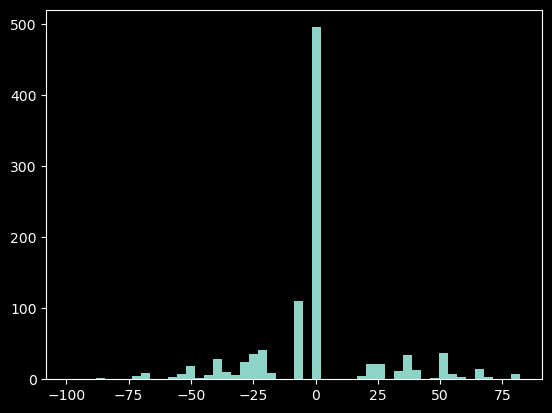

In [15]:
plt.hist(payoffs, bins=50);

In [16]:
np.mean(payoffs)

-0.533